Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">*EDIT!*</p>| <p style="text-align: left">*EDIT!*</p> | *EDIT!* |
| <p style="text-align: left">*EDIT!*</p>| <p style="text-align: left">*EDIT!*</p> | *EDIT!* |


<h2 style="text-align: center">344.105/6/7 UE: Natural Language Processing (WS2022/23)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1</h1>
<h2 style="color:rgb(0,120,170)">Document Classification with Standard Machine Learning Methods</h2>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Author:** Navid Rekab-saz<br>
**Email:** navid.rekabsaz@jku.at<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-preprocessing"><li style="font-size:large;font-weight:bold">Task A: Pre-processing & Feature Extraction (15 points)</li></a>
    <a href="#section-training"><li style="font-size:large;font-weight:bold">Task B: Training and Results Analysis (15 points)</li></a>
    <a href="#section-optional"><li style="font-size:large;font-weight:bold">Task C: Linear Model Interpretability (2 extra point)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective

The aim of this assignment is to implement a document (sentence) classification model using (standard) machine learning methods. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

</div>


<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, two datasets are provided. The datasets are taken from the data of `thedeep` project, produced by the DEEP (https://www.thedeep.io) platform. The DEEP is an open-source platform, which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset has 12 classes (labels) like agriculture, health, and protection. 

The difference between the datasets is in their sizes. We refer to these as `medium` and `small`, containing an overall number of 38,000 and 12,000 annotated text excerpts, respectively. Select one of the datasets, and use it for all of the tasks. `medium` provides more data and therefore reflects a more realistic scenario. `small` is however provided for the sake of convenience, particularly if running the experiments on your available hardware takes too long. Using `medium` is generally recommended, but from the point of view of assignment grading, there is no difference between the datasets.

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f083887a040183c5bebe366b04/43388/4737518022038762454/nlp2022_23_data.zip).

Whether `medium` or `small`, you will find the following files in the provided zip file:
- `thedeep.$name$.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.label.txt`: Captions of the labels.
- `README.txt`: Terms of use of the dataset.

</div>


<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<a name="section-preprocessing"></a><h2 style="color:rgb(0,120,170)">Task A: Pre-processing & Feature Extraction (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
**Preprocessing (4 points).** Load the train, validation, and test sets. Study the text and according to your judgements, apply at least <ins>two text cleaning/preprocessing methods</ins>. Punctuations marks, numbers, dates, case-sensitivity are some examples of the elements which can be potentially considered for cleaning/preprocessing. Tokenize the result text with a tokenizer of your choice. Report your approaches to text cleaning and tokenization and the reasons of your choices. Provide some examples, showing the effects of the applied approaches on the text.

**Creating dictionary (4 points).** Create a dictionary of vocabularies following the guidelines discussed in the lecture. Next, reduce the size of dictionary using a method of your choice, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs completely from the texts, or to replace them with a special token like <OOV\>. Explain your approaches and report the statistics of the dictionary before and after the reduction.

**Creating sentence vectors (4 points).** Use the dictionary to prepare <ins>two variations of document representation vectors</ins>, separately for train, validation, and test sets. Both variations follow a Bag-of-Words approach with a different token weighting method. One applied weighting must be `tf-idf` and the other one can be any other methods discussed in the lecture such as `tc`, `tf`, `BM25`. These term weighting methods should be implemented; using a library to readily calculate the term weightings is not allowed. Report the applied approaches. Calculate and report the sparsity rate of the vectors of train, validation, and test sets, namely what percentages of the vectors in each set are filled with zeros.

**Dimensionality reduction (3 points).** Reduce vectors' dimensions to $k$ by applying Latent Semantic Analysis (LSA) to the vectors of both variations. $k$ is a hyper-parameter and can be $10<k<1000$. Keep in mind the training and inference phases of LSA, when applied to the train, validation, and test sets. 

At the end of Task A, you should have the <ins>four feature vectors variations</ins> shown below, each consisting of the sets of train, validation, and test:
- **`Token Weighting I - High Dimensional`**
- **`Token Weighting I - Low Dimensional`**
- **`Token Weighting II - High Dimensional`**
- **`Token Weighting II - Low Dimensional`**


</div>

# Preprocessing

In [2]:
import pandas as pd
import numpy as np
import re
import nltk

In [8]:
# Load the train, validation, and test sets
BASE_DIR = 'data/nlp2022_23_data/'
TRAIN_FILE = BASE_DIR + 'thedeep.subset' + '.train.txt'
VAL_FILE = BASE_DIR + 'thedeep.subset' + '.validation.txt'
TEST_FILE = BASE_DIR + 'thedeep.subset' + '.test.txt'
LABEL_FILE = BASE_DIR + 'thedeep.' + 'labels.txt'

train_df = pd.read_csv(TRAIN_FILE, sep=',', header=None, names=['sentence_id', 'text', 'label'])
val_df = pd.read_csv(VAL_FILE, sep=',', header=None, names=['sentence_id', 'text', 'label'])
test_df = pd.read_csv(TEST_FILE, sep=',', header=None, names=['sentence_id', 'text', 'label'])
label_df = pd.read_csv(LABEL_FILE, sep=',', header=None, names=['label', 'caption'])

In [9]:
train_df

,sentence_id,text,label
0,5446,In addition to the immediate life-saving inter...,9
1,8812,There are approximately 2.6 million people cla...,3
2,16709,"While aid imports have held up recently, comme...",5
3,3526,Heavy rainfalls as well as onrush of water fro...,0
4,4928,"Based on field reports 9 , the main production...",3
...,...,...,...
12105,12744,The total gap in the number of people who requ...,8
12106,9655,A food crisis is looming in the country with t...,0
12107,6963,? Acute watery diarrhoea (AWD) continues to be...,4
12108,923,As South India grapples with drought and water...,11


In [10]:
# print length of each set
print('Train set length: ', len(train_df))
print('Validation set length: ', len(val_df))
print('Test set length: ', len(test_df))

Train set length:  12110
Validation set length:  2596
Test set length:  2595


In [11]:
# print average length of text in each set
print('Average length of text in train set: ', np.round(np.mean(train_df['text'].str.len()), 2))
print('Average length of text in validation set: ', np.round(np.mean(val_df['text'].str.len()), 2))
print('Average length of text in test set: ', np.round(np.mean(test_df['text'].str.len()), 2))

Average length of text in train set:  450.86
Average length of text in validation set:  446.5
Average length of text in test set:  440.51


In [12]:
label_df

,label,caption
0,0,Agriculture
1,1,Cross
2,2,Education
3,3,Food
4,4,Health
5,5,Livelihood
6,6,Logistic
7,7,NFI
8,8,Nutrition
9,9,Protection


Each label corresponds to a given caption, i.e., a category.

In [13]:
def map_label_to_caption(label):
    """
    Map label id to caption using label_df
    :param label: label id, int
    :return: label caption, str
    """
    return label_df[label_df['label'] == label]['caption'].values[0]

In [90]:
train_df = train_df.assign(caption=train_df['label'].apply(map_label_to_caption))
val_df = val_df.assign(caption=val_df['label'].apply(map_label_to_caption))
test_df = test_df.assign(caption=test_df['label'].apply(map_label_to_caption))

## Clean text

In [15]:
# remove punctuation marks, replace dates & numbers, apply case-sensitivity
def clean_text(text):
    """
    Clean text by removing punctuation marks, replacing dates & numbers, applying case-sensitivity
    :param text: text to clean, str
    :return: cleaned text, str
    """
    # remove punctuation marks
    text = re.sub(r'[^\w\s]', '', text)
    # replace dates
    text = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}', '< date >', text)
    # replace numbers
    text = re.sub(r'\d+', '< num >', text)
    # apply case-sensitivity
    text = text.lower()
    return text

In [16]:
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
val_df['cleaned_text'] = val_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

In [17]:
train_df

,sentence_id,text,label,cleaned_text
0,5446,In addition to the immediate life-saving inter...,9,in addition to the immediate lifesaving interv...
1,8812,There are approximately 2.6 million people cla...,3,there are approximately < num > million people...
2,16709,"While aid imports have held up recently, comme...",5,while aid imports have held up recently commer...
3,3526,Heavy rainfalls as well as onrush of water fro...,0,heavy rainfalls as well as onrush of water fro...
4,4928,"Based on field reports 9 , the main production...",3,based on field reports < num > the main produ...
...,...,...,...,...
12105,12744,The total gap in the number of people who requ...,8,the total gap in the number of people who requ...
12106,9655,A food crisis is looming in the country with t...,0,a food crisis is looming in the country with t...
12107,6963,? Acute watery diarrhoea (AWD) continues to be...,4,acute watery diarrhoea awd continues to be re...
12108,923,As South India grapples with drought and water...,11,as south india grapples with drought and water...


In [18]:
# normalize text
def normalize_text(text):
    """
    Normalize text by tokenizing and lemmatizing
    :param text: text to normalize, str
    :return: normalized text, str
    """
    # tokenize text
    tokens = nltk.word_tokenize(text)
    # lemmatize text
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [19]:
train_df['normalized_text'] = train_df['cleaned_text'].apply(normalize_text)

## Tokenization

In [20]:
# use BPE tokenizer
from tokenizers import Tokenizer
from tokenizers.models import BPE
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))

from tokenizers.trainers import BpeTrainer
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])

from tokenizers.pre_tokenizers import Whitespace
tokenizer.pre_tokenizer = Whitespace()

files =[TRAIN_FILE]
tokenizer.train(files, trainer)

In [21]:
# train_df['tokenized_text'] = train_df['cleaned_text'].apply(tokenizer.encode).apply(lambda x: x.tokens)
# train_df['tokenized_text']

In [22]:
# use NLTK tokenizer (TreebankWordTokenizer)
from nltk.tokenize import word_tokenize
train_df['tokenized_text'] = train_df['cleaned_text'].apply(word_tokenize)
val_df['tokenized_text'] = val_df['cleaned_text'].apply(word_tokenize)
test_df['tokenized_text'] = test_df['cleaned_text'].apply(word_tokenize)

## Stopwords

In [23]:
# remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
train_df['tokenized_text'] = train_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
val_df['tokenized_text'] = val_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
test_df['tokenized_text'] = test_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

## Compare

In [24]:
# compare text before preprocessing, after preprocessing, and after tokenization
def compare_text(text, cleaned_text, tokenized_text):
    """
    Compare text before preprocessing, after preprocessing, and after tokenization
    :param text: text before preprocessing, str
    :param cleaned_text: text after preprocessing, str
    :param tokenized_text: text after tokenization, list
    :return: None
    """
    print('Text before preprocessing: \n', text)
    print('Text after preprocessing: \n', cleaned_text)
    print('Text after tokenization: \n', tokenized_text, end='\n\n')

In [25]:
idx = 2

compare_text(train_df['text'][idx], train_df['cleaned_text'][idx], train_df['tokenized_text'][idx])

Text before preprocessing: 
 While aid imports have held up recently, commercial food and fuel imports remain well short of pre-blockade averages. I am particularly concerned about the recent decline of commercial food imports through the Red Sea ports. Pressure on the currency and a liquidity crisis in the Yemeni banking system make imports less viable for traders. Confidence among commercial shipping companies has eroded due to delays, including as a result of inspections undertaken by the Saudiled Coalition after these vessels have been cleared by UNVIM.
Text after preprocessing: 
 while aid imports have held up recently commercial food and fuel imports remain well short of preblockade averages i am particularly concerned about the recent decline of commercial food imports through the red sea ports pressure on the currency and a liquidity crisis in the yemeni banking system make imports less viable for traders confidence among commercial shipping companies has eroded due to delays i

In [26]:
idx = 42

compare_text(train_df['text'][idx], train_df['cleaned_text'][idx], train_df['tokenized_text'][idx])

Text before preprocessing: 
  According to media reports, in 2017 and as of 9 October 2017, 100 possible cholera cases have been reported in Saptari region in Nepal. 
Text after preprocessing: 
  according to media reports in < num > and as of < num > october < num > < num > possible cholera cases have been reported in saptari region in nepal 
Text after tokenization: 
 ['according', 'media', 'reports', '<', 'num', '>', '<', 'num', '>', 'october', '<', 'num', '>', '<', 'num', '>', 'possible', 'cholera', 'cases', 'reported', 'saptari', 'region', 'nepal']



In [27]:
idx = 100

compare_text(train_df['text'][idx], train_df['cleaned_text'][idx], train_df['tokenized_text'][idx])

Text before preprocessing: 
 With Sao Tome heavily dependent on food imports, food availability is unpredictable: there is no deep sea port; in bad weather, landing is difficult on the country’s one short airstrip. No cereals are cultivated on the island. The country is prone to natural disasters such as floods and landslides, which negatively affect crops and road access as well as destroy houses and household assets.
Text after preprocessing: 
 with sao tome heavily dependent on food imports food availability is unpredictable there is no deep sea port in bad weather landing is difficult on the countrys one short airstrip no cereals are cultivated on the island the country is prone to natural disasters such as floods and landslides which negatively affect crops and road access as well as destroy houses and household assets
Text after tokenization: 
 ['sao', 'tome', 'heavily', 'dependent', 'food', 'imports', 'food', 'availability', 'unpredictable', 'deep', 'sea', 'port', 'bad', 'weathe

# Dictionary

In [28]:
# create dictionary using train set
def create_dictionary(tokenized_text):
    """
    Create dictionary using train set
    :param tokenized_text: tokenized text, list
    :return: dictionary, dict
    """
    dictionary = {}
    for tokens in tokenized_text:
        for token in tokens:
            if token not in dictionary:
                dictionary[token] = 1
            else:
                dictionary[token] += 1
    return dictionary

In [29]:
dictionary = create_dictionary(train_df['tokenized_text'])

In [30]:
# print length of dictionary
print('Length of dictionary: ', len(dictionary))

Length of dictionary:  30396


In [31]:
# print most common words in dictionary
print('Most common words in dictionary: ', sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words in dictionary:  [('<', 41249), ('num', 41249), ('>', 41249), ('cases', 4758), ('food', 4138), ('people', 3799), ('reported', 3676), ('children', 2894), ('areas', 2551), ('water', 2519)]


In [32]:
# keep only top-N most frequent words
# removing any word with a lower frequency than a threshold
# OOV (out-of-vocabulary) words will be replaced with the <oov> token
def clean_dictionary(dictionary, N: int, threshold: int):
    """
    Clean dictionary by keeping only top-N most frequent words and removing any word with a lower frequency than a threshold
    :param dictionary: dictionary, dict
    :param N: top-N most frequent words, int
    :param threshold: threshold of word frequency, int
    :return: cleaned dictionary, dict
    """
    # keep only top-N most frequent words
    dictionary = dict(sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:N])

    # replace any word with a lower frequency than a threshold
    del_list = []
    for key, value in dictionary.copy().items():
        if value < threshold:
            dictionary['<oov>'] = dictionary.get('<oov>', 0) + value
            dictionary.pop(key)
    return dictionary

In [33]:
dictionary = clean_dictionary(dictionary, N=100_000, threshold=5)

In [34]:
# print length of dictionary
print('Length of dictionary: ', len(dictionary))

Length of dictionary:  8195


In [35]:
sorted(dictionary.items(), key=lambda x: x[1], reverse=True)

[('<', 41249),
 ('num', 41249),
 ('>', 41249),
 ('<oov>', 33980),
 ('cases', 4758),
 ('food', 4138),
 ('people', 3799),
 ('reported', 3676),
 ('children', 2894),
 ('areas', 2551),
 ('water', 2519),
 ('health', 2476),
 ('said', 1919),
 ('access', 1829),
 ('including', 1793),
 ('per', 1703),
 ('also', 1690),
 ('percent', 1657),
 ('due', 1639),
 ('affected', 1638),
 ('since', 1600),
 ('deaths', 1469),
 ('number', 1406),
 ('households', 1390),
 ('total', 1354),
 ('humanitarian', 1322),
 ('two', 1320),
 ('security', 1309),
 ('million', 1298),
 ('week', 1298),
 ('one', 1285),
 ('prices', 1268),
 ('new', 1246),
 ('cent', 1234),
 ('refugees', 1230),
 ('state', 1221),
 ('country', 1169),
 ('government', 1165),
 ('year', 1154),
 ('displaced', 1148),
 ('assistance', 1136),
 ('according', 1119),
 ('cholera', 1116),
 ('need', 1115),
 ('phase', 1114),
 ('suspected', 1080),
 ('south', 1079),
 ('high', 1070),
 ('acute', 1063),
 ('ipc', 1060),
 ('may', 1038),
 ('women', 1038),
 ('many', 1028),
 ('regio

In [36]:
# print most common words in dictionary
print('Most common words in dictionary: ', sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:10])
print('Least common words in dictionary: ', sorted(dictionary.items(), key=lambda x: x[1], reverse=False)[:10])

Most common words in dictionary:  [('<', 41249), ('num', 41249), ('>', 41249), ('<oov>', 33980), ('cases', 4758), ('food', 4138), ('people', 3799), ('reported', 3676), ('children', 2894), ('areas', 2551)]
Least common words in dictionary:  [('banking', 5), ('averaged', 5), ('yearthe', 5), ('droughtinduced', 5), ('secondlargest', 5), ('jilaal', 5), ('oppression', 5), ('teenage', 5), ('slum', 5), ('usaidfunded', 5)]


# Creating Sentence Vectors

## TF-IDF

In [37]:
# define term frequency
def term_frequency(word, tokenized_text):
    """
    Calculate term frequency
    :param word: word, str
    :param tokenized_text: tokenized text, list
    :return: term frequency, float
    """
    return np.log(tokenized_text.count(word) + 1)

# define inverse document frequency
def inverse_document_frequency(word, tokenized_text_list):
    """
    Calculate inverse document frequency
    :param word: word, str
    :param tokenized_text_list: list of tokenized texts, list
    :return: inverse document frequency, float
    """
    num_texts_containing_word = sum(word in tokenized_text for tokenized_text in tokenized_text_list)
    return np.log(len(tokenized_text_list) / (1 + num_texts_containing_word))

# define tf-idf
def tf_idf(word, tokenized_text, tokenized_text_list):
    """
    Calculate tf-idf
    :param word: word, str
    :param tokenized_text: tokenized text, list
    :param tokenized_text_list: list of tokenized texts, list
    :return: tf-idf, float
    """
    return term_frequency(word, tokenized_text) * inverse_document_frequency(word, tokenized_text_list)

In [38]:
# test
print('TF-IDF of word "num" in text 1: ', tf_idf('num', train_df['tokenized_text'][0], train_df['tokenized_text']))

TF-IDF of word "num" in text 1:  0.23354538677276349


In [54]:
from tqdm.auto import tqdm

# create tf-idf matrix
def create_tf_idf_matrix(tokenized_text_list, dictionary, idf):
    """
    Create tf-idf matrix
    :param tokenized_text_list: list of tokenized texts, list
    :param dictionary: dictionary, dict
    :param idf: idf for all words in dictionary, dict
    :return: tf-idf matrix, np.array
    """
    tf_idf_matrix = np.zeros((len(tokenized_text_list), len(dictionary)))
    for i, tokenized_text in enumerate(tqdm(tokenized_text_list, total=len(tokenized_text_list))):
        for j, word in enumerate(dictionary):
            tf_idf_matrix[i, j] = term_frequency(word, tokenized_text) * idf[word]
    return tf_idf_matrix

In [55]:
# define idf for all words in dictionary using vectorization, from scratch
def idf_all_words(dictionary, tokenized_text_list):
    """
    Calculate idf for all words in dictionary using vectorization, from scratch
    :param dictionary: dictionary, dict
    :param tokenized_text_list: list of tokenized texts, list
    :return: idf for all words in dictionary, dict
    """
    return {word: inverse_document_frequency(word, tokenized_text_list) for word in tqdm(dictionary, total=len(dictionary))}

idf = idf_all_words(dictionary, train_df['tokenized_text'])

  0%|          | 0/8195 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [56]:
tf_idf_matrix_train = create_tf_idf_matrix(train_df['tokenized_text'], dictionary, idf)

  0%|          | 0/12110 [00:00<?, ?it/s]

In [57]:
tf_idf_matrix_test = create_tf_idf_matrix(test_df['tokenized_text'], dictionary, idf)
tf_idf_matrix_val = create_tf_idf_matrix(val_df['tokenized_text'], dictionary, idf)

  0%|          | 0/2595 [00:00<?, ?it/s]

  0%|          | 0/2596 [00:00<?, ?it/s]

In [58]:
import pickle as pkl
pkl.dump(tf_idf_matrix_train, open('tf_idf_matrix_train.pkl', 'wb'))
pkl.dump(tf_idf_matrix_test, open('tf_idf_matrix_test.pkl', 'wb'))
pkl.dump(tf_idf_matrix_val, open('tf_idf_matrix_val.pkl', 'wb'))

In [59]:
tf_idf_matrix_train

array([[0.23354539, 0.23354539, 0.23354539, ..., 0.        , 0.        ,
        0.        ],
       [0.70063616, 0.70063616, 0.70063616, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46709077, 0.46709077, 0.46709077, ..., 0.        , 0.        ,
        0.        ]])

In [60]:
# print shape of tf-idf matrix
print('Shape of tf-idf matrix: ', tf_idf_matrix_train.shape)
print('Average tf-idf value of word "num" in text 1: ', tf_idf_matrix_train[0, list(dictionary.keys()).index(list(dictionary.keys())[0])])

Shape of tf-idf matrix:  (12110, 8195)
Average tf-idf value of word "num" in text 1:  0.23354538677276349


In [61]:
list(dictionary.keys()).index(list(dictionary.keys())[0])

0

## BM25

In [46]:
# define BM25
avg_len_text = np.mean([len(tokenized_text) for tokenized_text in train_df['tokenized_text']])

def bm25(word, tokenized_text, tokenized_text_list, idf=idf, k=1.4, b=0.9):
    """
    Calculate BM25
    :param word: word, str
    :param tokenized_text: tokenized text, list
    :param tokenized_text_list: list of tokenized texts, list
    :param k: k, float
    :param b: b, float
    :return: BM25, float
    """
    return idf[word] * (term_frequency(word, tokenized_text) * (k + 1)) / (term_frequency(word, tokenized_text) + k * (1 - b + b * len(tokenized_text) / avg_len_text))

In [47]:
# test
print('BM25 of word "num" in text 1: ', bm25('num', train_df['tokenized_text'][0], train_df['tokenized_text']))

BM25 of word "num" in text 1:  0.44945051332030167


In [48]:
idf

{'<': 0.3369347713195608,
 'num': 0.3369347713195608,
 '>': 0.3369347713195608,
 'cases': 1.9106992430122622,
 'food': 1.824664905670459,
 'people': 1.5396746248843896,
 'reported': 1.7587832009864202,
 'children': 1.9106992430122622,
 'areas': 1.917418193261007,
 'water': 2.230898358034633,
 'health': 2.1094496603732606,
 'said': 2.158988913753382,
 'access': 2.194667980339382,
 'including': 2.0972708900869828,
 'per': 2.5938518928472116,
 'also': 2.101314022279339,
 'percent': 2.688830635870068,
 'due': 2.1726729587538363,
 'affected': 2.2653036279568903,
 'since': 2.1618542452266687,
 'deaths': 2.5687551037609375,
 'number': 2.3691625755191317,
 'households': 2.6851920630261596,
 'total': 2.4673896266185795,
 'humanitarian': 2.52862300233462,
 'two': 2.389671542240758,
 'security': 2.500049629890564,
 'million': 2.6460179145628824,
 'week': 2.789745801714046,
 'one': 2.4189240850781957,
 'prices': 2.9325365197513653,
 'new': 2.5327723858814313,
 'cent': 2.97691781264175,
 'refugees'

In [62]:
# create BM25 matrix
def create_bm25_matrix(tokenized_text_list, dictionary, idf):
    """
    Create BM25 matrix
    :param tokenized_text_list: list of tokenized texts, list
    :param dictionary: dictionary, dict
    :param idf: idf for all words in dictionary, dict
    :return: BM25 matrix, np.array
    """
    bm25_matrix = np.zeros((len(tokenized_text_list), len(dictionary)))
    for i, tokenized_text in enumerate(tqdm(tokenized_text_list, total=len(tokenized_text_list))):
        for j, word in enumerate(dictionary):
            bm25_matrix[i, j] = bm25(word, tokenized_text, tokenized_text_list, idf)
    return bm25_matrix

In [63]:
bm25_matrix_train = create_bm25_matrix(train_df['tokenized_text'], dictionary, idf)
bm25_matrix_test = create_bm25_matrix(test_df['tokenized_text'], dictionary, idf)
bm25_matrix_val = create_bm25_matrix(val_df['tokenized_text'], dictionary, idf)

  0%|          | 0/12110 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [52]:

import pickle as pkl
pkl.dump(bm25_matrix_train, open('bm25_matrix_train.pkl', 'wb'))
pkl.dump(bm25_matrix_test, open('bm25_matrix_test.pkl', 'wb'))
pkl.dump(bm25_matrix_val, open('bm25_matrix_val.pkl', 'wb'))

### Comparison

In [98]:
# TODO

### Sparsity

In [73]:
# Calculate and report the sparsity rate of the vectors of train, validation, and test sets,
# namely what percentages of the vectors in each set are filled with zeros.

# sparsity of tf-idf
print('Sparsity of tf-idf matrix, train set: ', 1 - np.count_nonzero(tf_idf_matrix_train) / tf_idf_matrix_train.size)
print('Sparsity of tf-idf matrix, validation set: ', 1 - np.count_nonzero(tf_idf_matrix_val) / tf_idf_matrix_val.size)
print('Sparsity of tf-idf matrix, test set: ', 1 - np.count_nonzero(tf_idf_matrix_test) / tf_idf_matrix_test.size)

Sparsity of tf-idf matrix, train set:  0.9958957270374426
Sparsity of tf-idf matrix, validation set:  0.9959790770237404
Sparsity of tf-idf matrix, test set:  0.9959919637073689


In [74]:
# sparsity of BM25
print('Sparsity of BM25 matrix, train set: ', 1 - np.count_nonzero(bm25_matrix_train) / bm25_matrix_train.size)
print('Sparsity of BM25 matrix, validation set: ', 1 - np.count_nonzero(bm25_matrix_val) / bm25_matrix_val.size)
print('Sparsity of BM25 matrix, test set: ', 1 - np.count_nonzero(bm25_matrix_test) / bm25_matrix_test.size)

Sparsity of BM25 matrix, train set:  0.9958957270374426
Sparsity of BM25 matrix, validation set:  0.9959790770237404
Sparsity of BM25 matrix, test set:  0.9959919637073689


# Dimensionality reduction

In [69]:
# Reduce vectors’ dimensions to   by applying Latent Semantic Analysis (LSA) to the vectors of both variations.
# Report the sparsity rate of the vectors of train, validation, and test sets after dimensionality reduction.

# LSA
from sklearn.decomposition import TruncatedSVD

k_svd = 100
svd = TruncatedSVD(n_components=k_svd, n_iter=7, random_state=42)
svd.fit(tf_idf_matrix_train)

TruncatedSVD(n_components=100, n_iter=7, random_state=42)

In [71]:
tf_idf_matrix_train_lsa = svd.transform(tf_idf_matrix_train)
tf_idf_matrix_val_lsa = svd.transform(tf_idf_matrix_val)
tf_idf_matrix_test_lsa = svd.transform(tf_idf_matrix_test)

In [75]:
tf_idf_matrix_test_lsa

array([[ 0.69575791, -0.22465822, -0.08211086, ..., -0.1408919 ,
         0.0149918 , -0.23613306],
       [ 2.7280114 , -1.02332209,  1.19054081, ...,  0.77271061,
        -0.40028264,  0.38921487],
       [ 4.43634533,  2.26420834, -0.60081245, ...,  0.79922035,
        -2.37792393,  1.21858432],
       ...,
       [ 1.03428372, -0.38884351,  0.88744841, ..., -0.37965635,
         0.24784295, -0.29555749],
       [ 1.79399647,  0.07872835,  1.41394841, ..., -0.37099971,
         0.39624708, -0.30420575],
       [ 2.32308256, -0.17807667,  0.30095219, ..., -0.46450006,
        -0.07726602,  0.31003912]])

In [78]:
# sparsity of tf-idf after LSA
print('Sparsity of tf-idf matrix after LSA, train set: ', 1 - np.count_nonzero(tf_idf_matrix_train_lsa) / tf_idf_matrix_train_lsa.size)
print('Sparsity of tf-idf matrix after LSA, validation set: ', 1 - np.count_nonzero(tf_idf_matrix_val_lsa) / tf_idf_matrix_val_lsa.size)
print('Sparsity of tf-idf matrix after LSA, test set: ', 1 - np.count_nonzero(tf_idf_matrix_test_lsa) / tf_idf_matrix_test_lsa.size)

Sparsity of tf-idf matrix after LSA, train set:  0.0
Sparsity of tf-idf matrix after LSA, validation set:  0.0
Sparsity of tf-idf matrix after LSA, test set:  0.0


In [76]:
# BM25 after LSA
k_svd = 100
svd = TruncatedSVD(n_components=k_svd, n_iter=7, random_state=42)
svd.fit(bm25_matrix_train)

TruncatedSVD(n_components=100, n_iter=7, random_state=42)

In [77]:
bm25_matrix_train_lsa = svd.transform(bm25_matrix_train)
bm25_matrix_val_lsa = svd.transform(bm25_matrix_val)
bm25_matrix_test_lsa = svd.transform(bm25_matrix_test)

In [79]:
# sparsity of BM25 after LSA
print('Sparsity of BM25 matrix after LSA, train set: ', 1 - np.count_nonzero(bm25_matrix_train_lsa) / bm25_matrix_train_lsa.size)
print('Sparsity of BM25 matrix after LSA, validation set: ', 1 - np.count_nonzero(bm25_matrix_val_lsa) / bm25_matrix_val_lsa.size)
print('Sparsity of BM25 matrix after LSA, test set: ', 1 - np.count_nonzero(bm25_matrix_test_lsa) / bm25_matrix_test_lsa.size)

Sparsity of BM25 matrix after LSA, train set:  0.0
Sparsity of BM25 matrix after LSA, validation set:  0.0
Sparsity of BM25 matrix after LSA, test set:  0.0


<a name="section-training"></a><h2 style="color:rgb(0,120,170)">Task B: Training and Results Analysis (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

To evaluate the models, use <ins>accuracy</ins> as the metric throughout the task. 

**Dummy baseline (2 points).** Create one dummy baseline classifier that predicts the validation/test labels only based on the distribution of the labels in the training set (without any use of the feature vectors). This is a weak baseline and acts as a sanity check for the actual classifiers.

**Training and tuning classifiers (5 points).** Select at least <ins>two classification algorithms</ins> from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in <ins>eight experiment sets</ins> (4 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters (also keep in mind the dimensionality size $k$ in the low-dimensional vectors as yet another hyper-parameter). For each experiment, select <ins>one of the hyper-parameters and tune its value</ins>. The tuning process is done by first assigning at least <ins>five different values</ins> to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter. 

**Evaluation, reporting results, and discussion (3 point).** Evaluate the selected model of the eight experiment on the test set and report the results of the experiments on <ins>both validation and test sets (side by side) in one table as well as in one plot</ins>. Compare different models. Are the test results lower(/higher) than the validation results? If it is the case, where can it be rooted from? Among all these models and variations, what are the most important factors improving the classification results?

**Confusion matrix (2 point).** Select the best performing model among the experiments and use it to create a confusion matrix. The matrix shows the predicted versus true results per each label. Explain your observations on the matrix. Across which classes do you observe significant confusions?

**Features visualization (3 point).** Continue with the best performing model and now take its feature vectors for the *dataitems in the test set*. Project these feature vectors to a 2-dimensional space using the TSNE method.  Using these 2-dimensional vectors, create two plots where the dataitems are shown as points (small circles) on the plots. The plots look exactly the same but only differ in the coloring of the data points. The first plot colors every dataitem with its *true label*, while the second one colors each according to its *predicted label by the model*. Keep in mind to assign the same colors to the classes of the plots, so that the plots are visually comparable. Put these two plots side by side, observe the differences, and compare the results. Report your observations.


</div>

# Dummy baseline

In [91]:
y_train = train_df['label']
y_val = val_df['label']
y_test = test_df['label']

In [98]:
# check the distribution of labels in the training set
y_train.value_counts()

4     2829
9     2657
3     2079
10     947
11     754
2      602
8      564
5      559
1      500
0      238
7      226
6      155
Name: label, dtype: int64

In [93]:
train_df['caption'].value_counts()

Health         2829
Protection     2657
Food           2079
Shelter         947
WASH            754
Education       602
Nutrition       564
Livelihood      559
Cross           500
Agriculture     238
NFI             226
Logistic        155
Name: caption, dtype: int64

<AxesSubplot: >

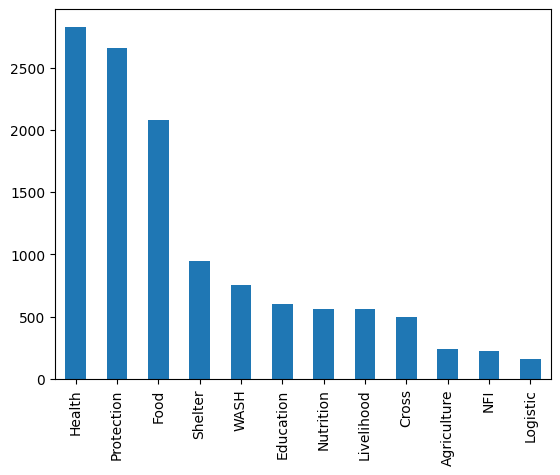

In [97]:
train_df['caption'].value_counts().plot(kind='bar')

In [89]:
train_df

,sentence_id,text,label,cleaned_text,normalized_text,tokenized_text
0,5446,In addition to the immediate life-saving inter...,9,in addition to the immediate lifesaving interv...,in addition to the immediate lifesaving interv...,"[addition, immediate, lifesaving, intervention..."
1,8812,There are approximately 2.6 million people cla...,3,there are approximately < num > million people...,there are approximately < num > million people...,"[approximately, <, num, >, million, people, cl..."
2,16709,"While aid imports have held up recently, comme...",5,while aid imports have held up recently commer...,while aid import have held up recently commerc...,"[aid, imports, held, recently, commercial, foo..."
3,3526,Heavy rainfalls as well as onrush of water fro...,0,heavy rainfalls as well as onrush of water fro...,heavy rainfall a well a onrush of water from t...,"[heavy, rainfalls, well, onrush, water, upstre..."
4,4928,"Based on field reports 9 , the main production...",3,based on field reports < num > the main produ...,based on field report < num > the main product...,"[based, field, reports, <, num, >, main, produ..."
...,...,...,...,...,...,...
12105,12744,The total gap in the number of people who requ...,8,the total gap in the number of people who requ...,the total gap in the number of people who requ...,"[total, gap, number, people, require, assistan..."
12106,9655,A food crisis is looming in the country with t...,0,a food crisis is looming in the country with t...,a food crisis is looming in the country with t...,"[food, crisis, looming, country, seasons, maiz..."
12107,6963,? Acute watery diarrhoea (AWD) continues to be...,4,acute watery diarrhoea awd continues to be re...,acute watery diarrhoea awd continues to be rep...,"[acute, watery, diarrhoea, awd, continues, rep..."
12108,923,As South India grapples with drought and water...,11,as south india grapples with drought and water...,a south india grapple with drought and water s...,"[south, india, grapples, drought, water, short..."


In [85]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(tf_idf_matrix_train_lsa, y_train)

DummyClassifier(strategy='most_frequent')

In [86]:
# Evaluation on validation set
from sklearn.metrics import accuracy_score

y_pred = dummy_clf.predict(tf_idf_matrix_val_lsa)
print('Accuracy on validation set: ', accuracy_score(y_val, y_pred))

Accuracy on validation set:  0.2561633281972265


# Training and tuning classifiers

 Select at least  two classification algorithms  from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in  eight experiment sets  (4 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters (also keep in mind the dimensionality size   in the low-dimensional vectors as yet another hyper-parameter). For each experiment, select  one of the hyper-parameters and tune its value . The tuning process is done by first assigning at least  five different values  to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter.

In [102]:
from sklearn.metrics import classification_report

## Algorithm 1: Linear SVM

In [103]:
from sklearn.linear_model import SGDClassifier

### Experiment 1: TF-IDF, full data

In [110]:
# fit naively
clf = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=1e-3, random_state=42, max_iter=5, tol=None, n_jobs=-1, verbose=1)
clf.fit(tf_idf_matrix_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 27.44, NNZs: 1604, Bias: -24.318677, T: 12110, Avg. loss: 0.456096
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 29.13, NNZs: 1596, Bias: -15.568741, T: 12110, Avg. loss: 0.430151
Total training time: 0.89 seconds.
-- Epoch 2
Norm: 31.83, NNZs: 1683, Bias: -17.938434, T: 12110, Avg. loss: 0.668913
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 45.85, NNZs: 2811, Bias: -12.702698, T: 12110, Avg. loss: 1.467065
Total training time: 1.09 seconds.
-- Epoch 2
Norm: 29.91, NNZs: 1608, Bias: -17.148331, T: 12110, Avg. loss: 0.369213
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 47.97, NNZs: 3242, Bias: -5.636092, T: 12110, Avg. loss: 1.579759
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 47.24, NNZs: 3056, Bias: -16.404782, T: 12110, Avg. loss: 1.763037
Total training time: 1.17 seconds.
-- Epoch 2
Norm: 50.64, NNZs: 3236, Bias: -9.640378, T: 12110, Avg. loss: 2.246503
Total tr

[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    5.4s remaining:    1.0s


Norm: 24.75, NNZs: 2904, Bias: -1.090755, T: 48440, Avg. loss: 0.079024
Total training time: 3.04 seconds.
-- Epoch 5
Norm: 22.00, NNZs: 2760, Bias: -0.989983, T: 60550, Avg. loss: 0.060472
Total training time: 3.75 seconds.


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.5s finished


SGDClassifier(alpha=0.001, max_iter=5, n_jobs=-1, penalty='elasticnet',
              random_state=42, tol=None, verbose=1)

In [111]:
# Evaluation on validation set
y_pred = clf.predict(tf_idf_matrix_val)
print('Accuracy on validation set: ', accuracy_score(y_val, y_pred))

# additionally, we check the classification report
# look at F1-Score, Precision, Recall, and relationship between Support & metrics
print(classification_report(y_val, y_pred))

Accuracy on validation set:  0.7761941448382126
              precision    recall  f1-score   support

           0       0.63      0.23      0.33        53
           1       0.42      0.30      0.35       122
           2       0.89      0.78      0.83       140
           3       0.80      0.80      0.80       420
           4       0.87      0.91      0.89       665
           5       0.47      0.50      0.48       113
           6       0.45      0.18      0.26        28
           7       0.68      0.61      0.64        38
           8       0.86      0.78      0.82       102
           9       0.76      0.84      0.80       546
          10       0.72      0.73      0.72       195
          11       0.78      0.86      0.81       174

    accuracy                           0.78      2596
   macro avg       0.69      0.63      0.65      2596
weighted avg       0.77      0.78      0.77      2596



In [112]:
# TODO: hyper-parameter tuning

<a name="section-optional"></a><h2 style="color:rgb(0,120,170)">Task C: Linear Model Interpretability (2 extra point)</h2>

<div style="background-color:rgb(224, 243, 255)">
Train a logistic regression model on the high-dimensional vectors. Take the coefficient weights, learned by the model, on each dimension (which here corresponds to each token in the dictionary). Separately for each class, study what are the tokens that have the highest contributions/importance for the predictions of the model.
</div>